In [47]:
from sellers import *
from bidders import *

import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [49]:
evaluations = np.array([0.25, 0.5, 0.99])
probs = np.array([0.5, 0.4, 0.1])

r = 0
t = 1000

results = {}

a = [1, 0.75, 0.5, 0.4, 0.35, 0.3, 0.25, 0.2, 0.15, 0.1, 0.05, 0]
for a0 in a:
  r = 0
  for i in range(50):

    seller = PreDemo(t)
    seller2 = FixedPrice(a0)
#     bidder = EXP3(0.001, evaluations, seller.N + 1, True)
    bidder = UCB(1, evaluations, 3, True)
    simu = MultiSellerSimulator([seller, seller2], bidder, True, evaluations, probs, t)
    simu.start()
    r += simu.revenue
  results[a0] = r / 50 / 1000

In [41]:
r / 100 / 1000

0.0015

In [42]:
ucb_full_results = results

In [34]:
asym_b = np.array(a) + 0.003

In [30]:
import matplotlib

In [31]:
matplotlib.style.use('ggplot')

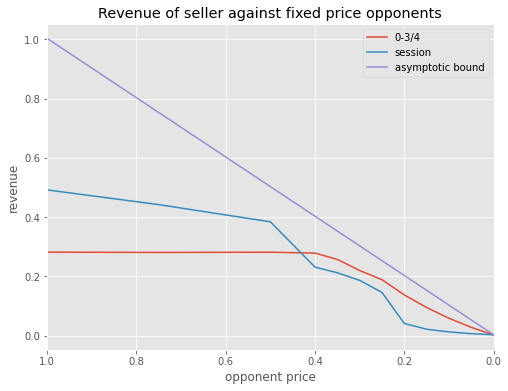

In [60]:
fig = plt.figure(figsize=(8,6))

plt.plot(a, list(results.values()), label = "0-3/4")
plt.plot(a, list(ucb_full_results.values()), label = "session")

plt.plot(a, asym_b, label = "asymptotic bound")
plt.xlim([1, 0])

plt.xlabel("opponent price")
plt.ylabel("revenue")

plt.title("Revenue of seller against fixed price opponents")
plt.legend()



In [50]:
ucb_full_results

{1: 0.4918,
 0.75: 0.44222,
 0.5: 0.38422,
 0.4: 0.23124,
 0.35: 0.21228,
 0.3: 0.1866,
 0.25: 0.14582,
 0.2: 0.04106,
 0.15: 0.02166,
 0.1: 0.012539999999999999,
 0.05: 0.006679999999999999,
 0: 0.003}